In [233]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from matplotlib import style 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

%matplotlib inline

In [234]:
#Preparacion de los datos
df = pd.read_csv(filepath_or_buffer = "./beisbol.csv", sep=',', low_memory=False)
df.describe()

,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


In [235]:
df.head()

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [236]:
X = df['bateos'].values.reshape(-1,1)
y = df['runs'] .values.reshape(-1,1)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
# modelo regresion lineal simple
model = LinearRegression()

# Entrena el modelo
model.fit(X_train, y_train)

LinearRegression()

In [239]:
print(model.intercept_)
print(model.coef_)

[-2981.51721258]
[[0.66685087]]


In [240]:
#predecir
y_pred = model.predict(X_test)

In [241]:
print(len(y_test), len(y_pred))

6 6


In [242]:
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_results

,Actual,Predicted
0,570,676.826633
1,713,738.843764
2,645,654.153704
3,704,692.164203
4,735,715.503983
5,615,751.513930


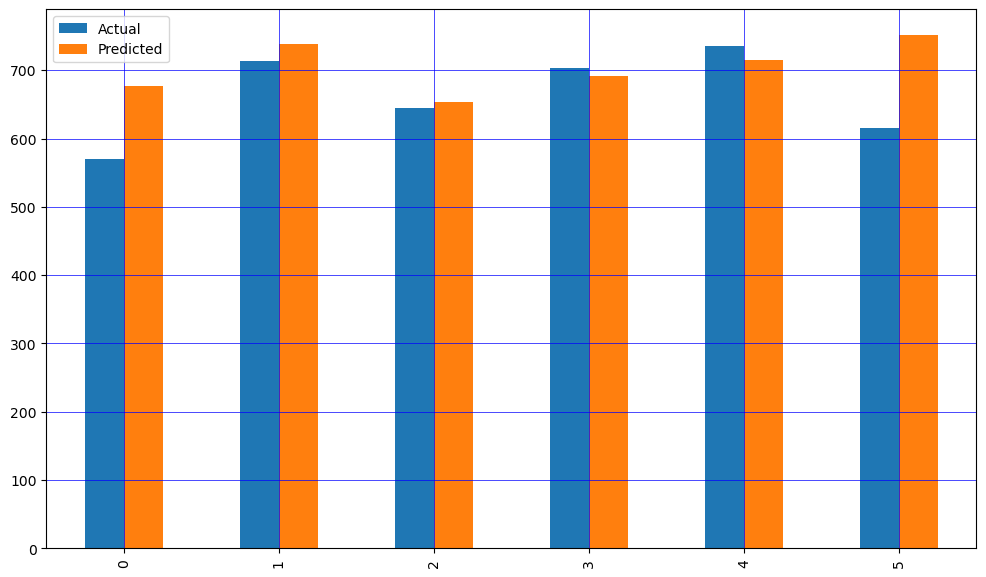

In [243]:
# Gráfica personalizada

df_results.plot(kind='bar',figsize=(12,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()

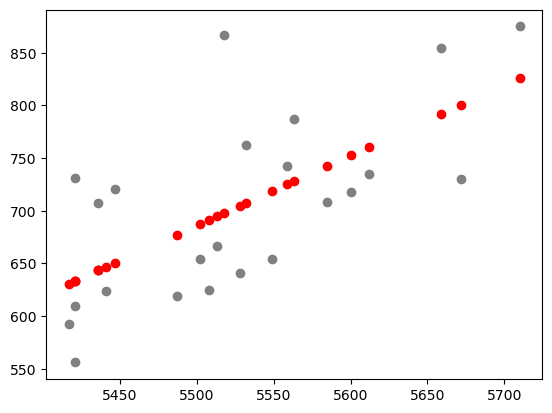

In [244]:
# Gráfica de dispersión datos de entrenamiento
#puntos reales
plt.scatter(X_train, y_train,  color='gray')
#puntos predichos
plt.scatter(X_train, model.predict(X_train), color='red')
plt.show()

In [245]:
# Optimización del modelo
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 51.61164068147824
Mean Squared Error: 5219.975632116472


In [246]:
#Optimizar el modelo escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()


In [247]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [248]:
#predecir
y_pred = model.predict(X_test_scaled)

print(len(y_test), len(y_pred))

df_results_scaled = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_results_scaled

6 6


,Actual,Predicted
0,570,676.826633
1,713,738.843764
2,645,654.153704
3,704,692.164203
4,735,715.503983
5,615,751.513930


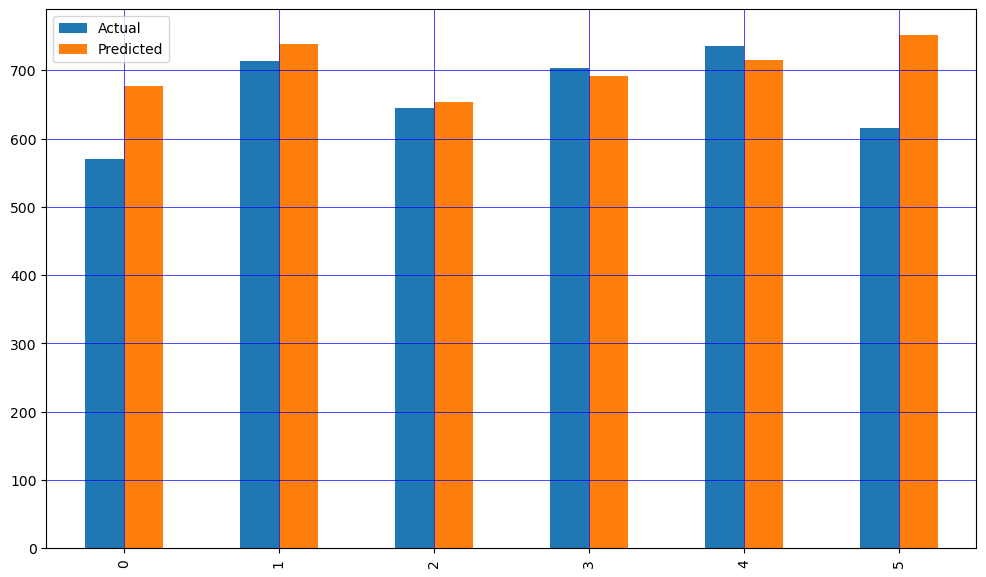

In [249]:
# Gráfica personalizada

df_results_scaled.plot(kind='bar',figsize=(12,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()


In [250]:
#Evaluación del modelo
print('Random Forest - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Random Forest - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Random Forest - Mean Absolute Error: 51.61164068147824
Random Forest - Mean Squared Error: 5219.975632116457


In [251]:
# Cargar datos
df_rf = pd.read_csv(filepath_or_buffer="./beisbol.csv", sep=',', low_memory=False)

# Preparar datos
X = df_rf['bateos'].values.reshape(-1, 1)
y = df_rf['runs'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [252]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train.flatten())

RandomForestRegressor(random_state=42)

In [253]:
y_pred_rf = model_rf.predict(X_test)

In [254]:
# Evaluación del modelo
print('Random Forest - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Random Forest - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))

Random Forest - Mean Absolute Error: 56.70541666666668
Random Forest - Mean Squared Error: 3862.773767708335


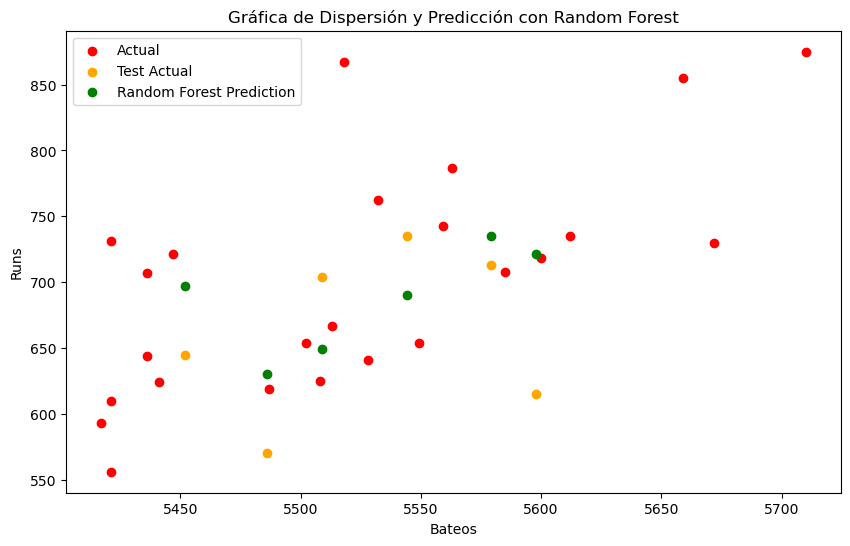

In [255]:
# Gráfica de dispersión con ajuste de Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Actual')
plt.scatter(X_test, y_test, color='orange', label='Test Actual')
plt.scatter(X_test, y_pred_rf, color='green', label='Random Forest Prediction')
plt.title('Gráfica de Dispersión y Predicción con Random Forest')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [256]:
model_rf_tuned = RandomForestRegressor(random_state=42)
# Definir los parámetros a buscar
# n_estimators: número de árboles en el bosque
# max_depth: profundidad máxima del árbol
# min_samples_split: número mínimo de muestras requeridas para dividir un nodo
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10]}
# Utilizar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(model_rf_tuned, param_grid, cv=5)
grid_search.fit(X_train, y_train.flatten())

# Obtener el modelo con los mejores hiperparámetros
best_model_rf = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_rf_tuned = best_model_rf.predict(X_test)

In [257]:
# Evaluación del modelo
print('Random Forest Optimizado - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf_tuned))
print('Random Forest Optimizado - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf_tuned))

Random Forest Optimizado - Mean Absolute Error: 52.880320998445995
Random Forest Optimizado - Mean Squared Error: 4897.952567702964


In [258]:
# En conclusión, el modelo de Random Forest optimizado tiene un mejor desempeño que el modelo de regresión lineal simple. 
# Esto se puede observar en las métricas de error, donde el modelo de Random Forest tiene un menor error absoluto medio y
# un menor error cuadrático medio. Además, se puede observar en la gráfica de dispersión, donde el modelo de Random Forest
# se ajusta mejor a los datos.